## CA model

### Basic functions

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate grid of traders
def grid_stock_market(L, fundamentalist_probability):
    # Generate an L by L array with random values between 0 and 1
    random_grid = np.random.rand(L, L)
    # Convert values to 0 or 1 based on the probability of a fundamentalist
    result_grid = (random_grid > fundamentalist_probability).astype(int)
    return result_grid


# Required for all levels
# Set up transition table
def transition_table(array):
    return np.mean(np.array(array))

# Transaction quantity
def calculation_transaction_quantity(transactions, L):
    total_transactions = 0
    for row in range(L):
        for column in range(L):
            total_transactions = total_transactions + transactions[row, column]
    return total_transactions

# Price function 
def price_function(previous_price, sensitivity_contant, L, transaction_quantity):
    price = previous_price + sensitivity_contant*transaction_quantity/(L**2)
    if price < 0 :
        price = 0
    return price

# Set up function for state changes (Level 1)
def next_state(trader_grid, cur_state, price, fundamental_value, L):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            if trader_type == 0:
                transaction_quantity[row_index,column_index] = fundamental_value - price
            else: 
                transaction_quantity[row_index,column_index] = transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

# Expansion for function of level 2
def news_influence(trader_type, parameters, phi_fu, phi_im):
    c_fundamentalist, c_imitator = parameters
    assert (trader_type == 0 or trader_type == 1)
    if trader_type == 0:
        factor_news = 1 + c_fundamentalist*phi_fu
    elif trader_type == 1: 
        factor_news = 1 + c_imitator*phi_im
    return factor_news
def next_state_Level_2(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price)
            else: 
                transaction_quantity[row_index,column_index] = news*transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

# Expansion for level 3
def price_fluctuations(k, prices):
    k = min(k, len(prices))
    P_bar = sum(prices[-k:]) / k  # Calculate the average price
    Lt = sum(abs(P_i - P_bar) for P_i in prices[-k:]) / P_bar / k
    return Lt
#    prices_considered = []
#    if len(price_list) >= period_length:
 #       for idx in range(len(price_list) - (period_length), len(price_list)):
 #           prices_considered.append(price_list[idx])
  #      price_fluctuation = 0
  #     for idx in range(period_length):
   #         assert period_length == len(prices_considered)
    #        price_fluctuation = price_fluctuation + 1/period_length * abs(prices_considered[idx]-(len(prices_considered)/period_length)*np.mean(prices_considered))/np.mean(prices_considered)
            
    #else:
     #   for idx in range(len(price_list)):
      #      prices_considered.append(price_list[idx])
       # price_fluctuation = 0
        #for idx in range(len(price_list)):
         #   price_fluctuation = price_fluctuation + 1/(len(price_list)+1) * abs(prices_considered[idx] - np.mean(prices_considered))/np.mean(prices_considered)
   
def trading_activity_function(Cl, Lt, Lm):
    """
    Calculate the current trading activity M^t.

    :param Lt: Current price volatility level
    :param Cl: Parameter
    :param Lm: Threshold
    :return: Current trading activity level
    """
    # The lower bound of Mt is 0.05
    if Lt <= Lm:
        return max(Cl * Lt, 0.05)
    else:
        return max(Cl * (-Lt + 2 * Lm), 0.05)
#def trading_activity_function(constant, price_fluctuation, stock_favorability):
#   trade_activity = 0
 #   if price_fluctuation <= stock_favorability:
  #      trade_activity = constant*price_fluctuation
   # elif price_fluctuation > stock_favorability:
    #    trade_activity = constant*(-price_fluctuation + 2*stock_favorability)
     
   # trade = trade_activity
    #if trade_activity < 0.05:
     #   trade = 0.05
    #else: 
     #   trade = trade_activity
    #return trade

def next_state_Level_3(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L, trades):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price) * trades
            else: 
                transaction_quantity[row_index,column_index] = trades*news*transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

### Level 1

In [4]:
def Level_1_simulation(trader_grid, initial_price, fundamental_value, time, L, sensitivity_contant):
    # initialize price list for market
    price_list = [initial_price]
    # initialize transaction quantities. Note that this implies at t=0 we initialize with imitators not trading and fundamentalists changing to the updated price values
    transaction_quantities = next_state(trader_grid, np.zeros((L,L)), price_list[-1], fundamental_value, L)
    transactions = [transaction_quantities]
    for t in range(time):
        transactions.append(next_state(trader_grid, transactions[-1], price_list[-1], fundamental_value, L))
        trans_quantity = calculation_transaction_quantity(transactions[-1], L)
        price_list.append(price_function(price_list[-1],sensitivity_contant,L, trans_quantity))
    return np.array(transactions), np.array(price_list)


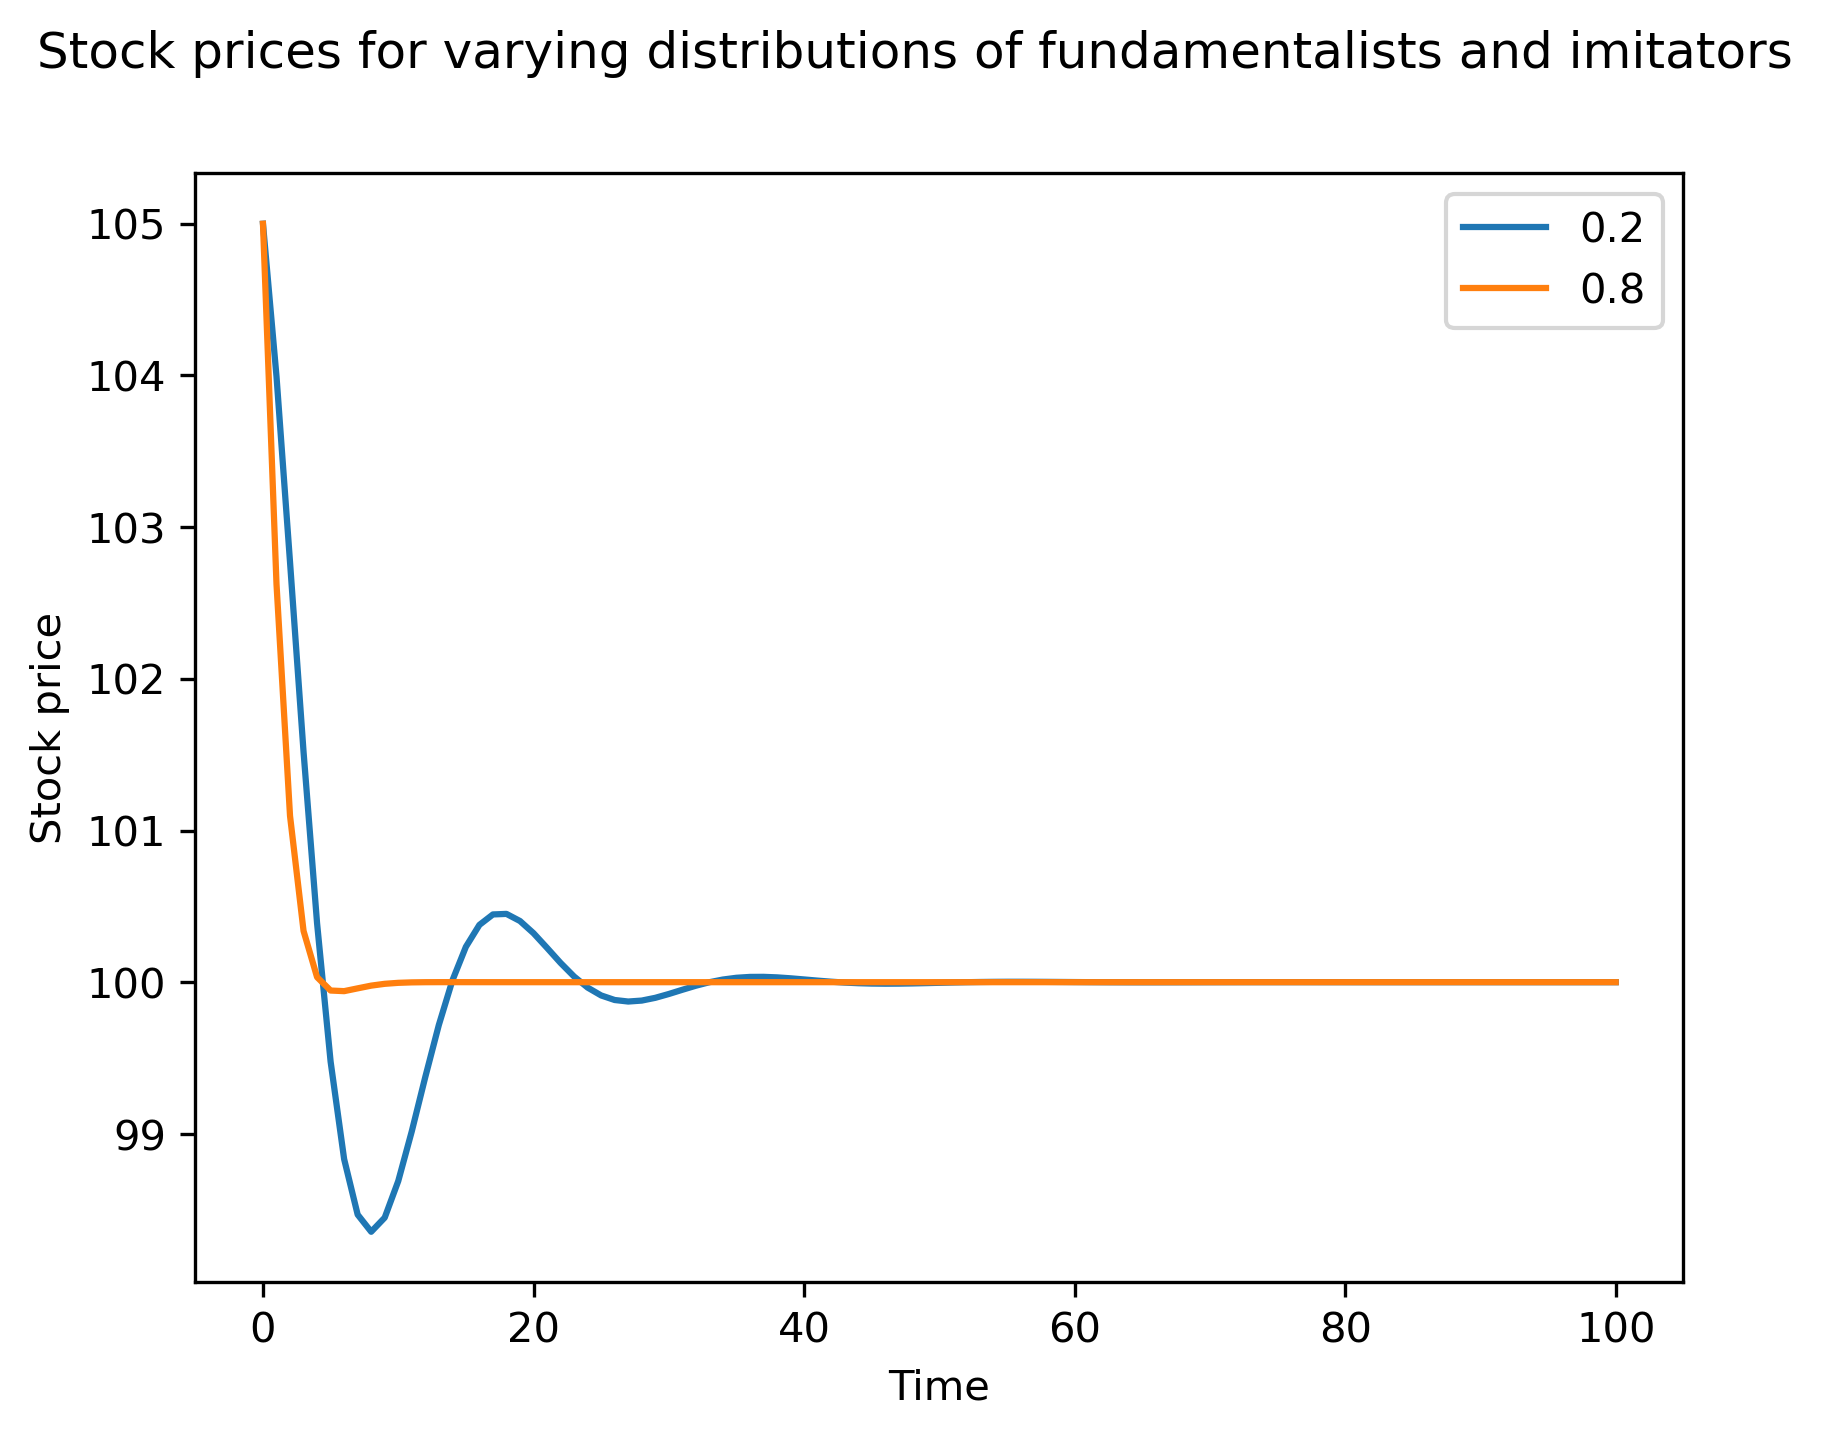

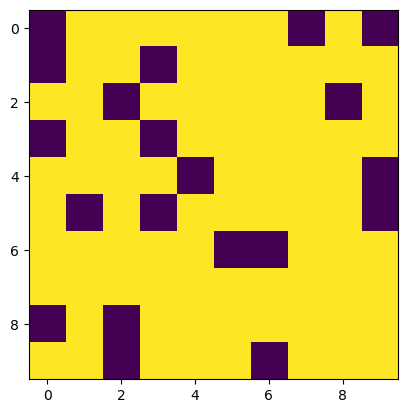

In [5]:
# Verification plots for Level 1 model
fundamentalists_probabilities = [0.2, 0.8]
L = 10
fundamental_value = 100
initial_price = 105
time = 100
constant = 0.5

plt.figure(dpi = 300)
for p in fundamentalists_probabilities:
    trader_grid = grid_stock_market(L, p)
    prices = Level_1_simulation(trader_grid, initial_price, fundamental_value, time, L, constant)
    plt.plot(np.arange(time + 1), prices[1], label = p)
plt.suptitle('Stock prices for varying distributions of fundamentalists and imitators')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()
plt.close()
    

trader_grid_presentation = grid_stock_market(L, 0.2)
# Plot trader type distribution
im = plt.imshow(trader_grid_presentation)
plt.show()

### Level 3 model

In [6]:
def Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, sensitivity_contant, constant_trading, news_relevance, stock_favorability, period_length):
    # initialize price list for market
    price_list = [initial_price]
    price_fluctuation = price_fluctuations(period_length, price_list)
    price_fluctuation_list = [price_fluctuation]
    trades = trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
    trades_list = [trades]
    
    # initialize transaction quantities. Note that this implies at t=0 we initialize with imitators not trading and fundamentalists changing to the updated price values
    transaction_quantities = next_state_Level_3(trader_grid, np.zeros((L,L)), price_list, fundamental_value, news_relevance, L, trades)
    transactions = [transaction_quantities]
    for t in range(time):
        price_fluctuation = price_fluctuations(period_length, price_list)
        price_fluctuation_list.append(price_fluctuation)
        trades = trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
        trades_list.append(trades)
        
        transactions.append(next_state_Level_3(trader_grid, transactions[-1], price_list, fundamental_value, news_relevance, L, trades))
        trans_quantity = calculation_transaction_quantity(transactions[-1], L)
        price_list.append(price_function(price_list[-1],sensitivity_contant,L, trans_quantity))
    return np.array(transactions), np.array(price_list), np.array(price_fluctuation_list), np.array(trades_list)


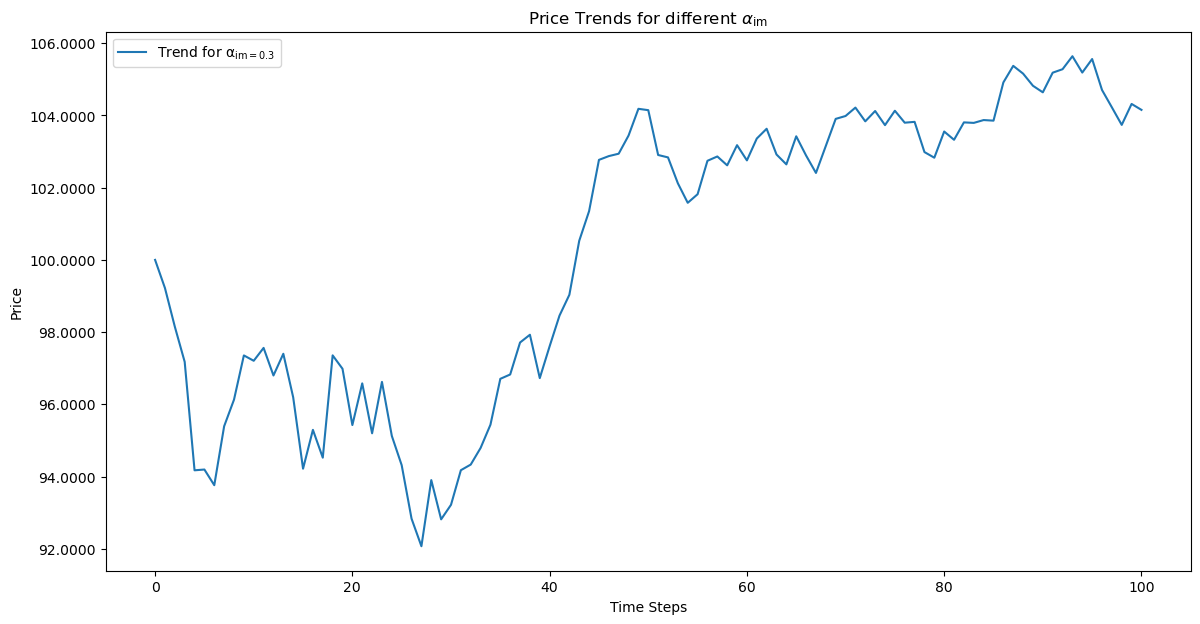

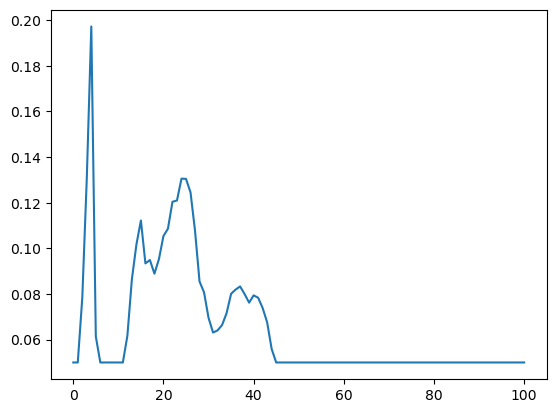

In [7]:
L = 100
fundamental_value = 100
initial_price = 100
time = 100
constant = 2
trader_grid = grid_stock_market(L, 0.3)
constant_trading = 20
news_relevance = [0.2, 0.7]
stock = 0.01
period = 100


resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, constant, constant_trading, news_relevance, stock, period)
from matplotlib.ticker import FormatStrFormatter
a = {0.3:resultS[1]}
plt.figure(figsize=(14, 7))
for key, values in a.items():
    plt.plot(values, label=r'Trend for $\mathrm{\alpha_{im=' + str(key) + '}}$')
plt.title(r'Price Trends for different $\alpha_{\mathrm{im}}$')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(time+1), resultS[3])
plt.show()
plt.close()


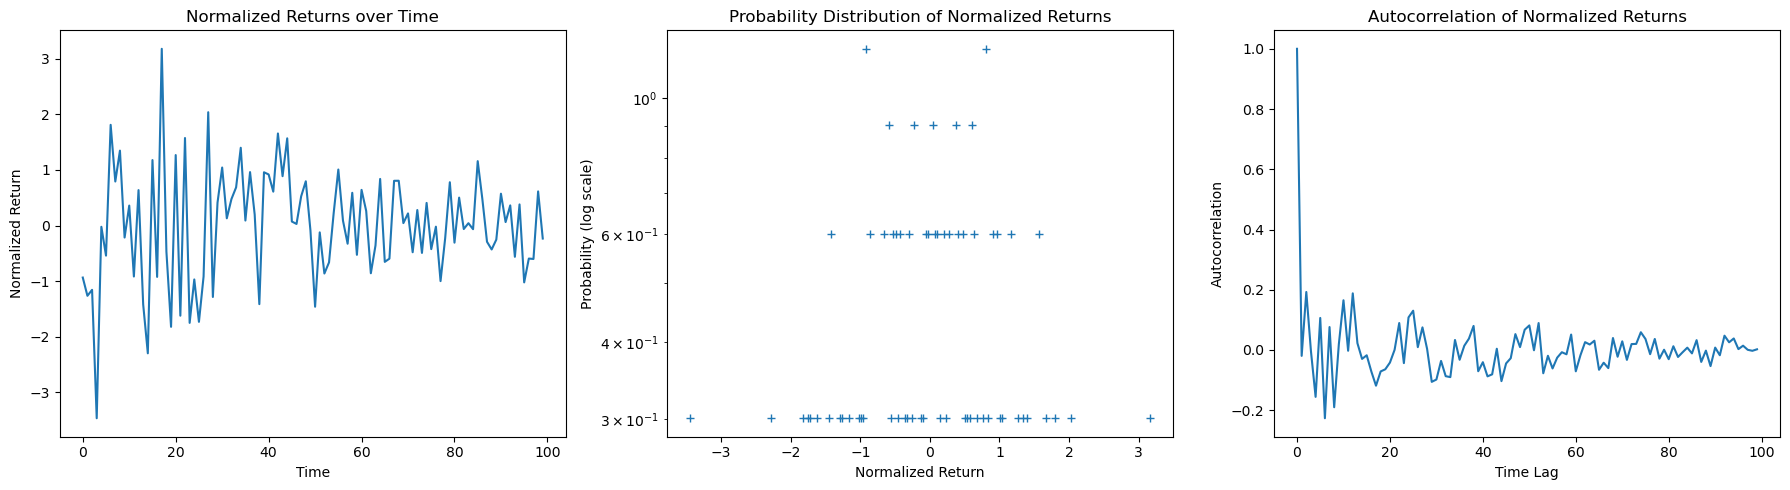

In [8]:
price_history = a[0.3]
returns = np.diff(price_history)
mean_return = np.mean(returns)
std_return = np.std(returns)
normalized_returns = [(ret - mean_return) / std_return for ret in returns]

# Calculate the distribution of normalized returns
# Use more bins for higher resolution in the histogram
hist, bins = np.histogram(normalized_returns, bins=200, density=True) 
# hist - The number of intervals divided into
# bins - The boarder of the intervals
bin_centers = 0.5 * (bins[1:] + bins[:-1]) 

# Autocorrelation
autocorr_returns = np.correlate(normalized_returns, normalized_returns, mode='full')
autocorr_returns = autocorr_returns[autocorr_returns.size // 2:]
autocorr_returns /= autocorr_returns[0]
# Plot the figures
plt.figure(figsize=(18, 5))

# Plot (a) Time series of normalized returns
plt.subplot(1, 3, 1)
plt.plot(normalized_returns)
plt.xlabel('Time')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns over Time')

# Plot (b) Distribution of normalized returns with only y-axis in log scale
plt.subplot(1, 3, 2)
plt.semilogy(bin_centers, hist, linestyle='None', marker='+')
plt.xlabel('Normalized Return')
plt.ylabel('Probability (log scale)')
plt.title('Probability Distribution of Normalized Returns')

# Plot (c) Autocorrelation function of returns
plt.subplot(1, 3, 3)
plt.plot(autocorr_returns[:])
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Normalized Returns')

plt.tight_layout()
plt.show()

Garch test

In [9]:
L = 100
fundamental_value = 100
initial_price = 100
time = 100
constant = 0.7
trader_grid = grid_stock_market(L, 0.3)
constant_trading = 20
news_relevance = [0.2, 0.7]
stock = 0.01
period = 100

resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, 
                   constant, constant_trading, news_relevance, stock, period)
print(resultS[1])

price_history = resultS[1]


[100.          99.90316824  99.93104616 100.19009377 100.37251082
 100.37259556  99.96652712 100.01303348 100.20822518 100.44517897
 100.21737127 100.42246079 100.08185665 100.26961381 100.58302903
 100.78599845 100.82912256 100.75597821 100.64843869 100.67821079
 100.46417576 100.60467546 100.42739111 100.11867649 100.38909737
 100.8915614  100.88469909 101.16492401 100.96143621 100.80299973
 100.41197254 100.26041897 100.37560049 100.36315181 100.3281256
 100.39206086 100.24051707 100.1001049  100.08280155 100.4067747
 100.44189255 100.11339933 100.1349629  100.0811521  100.22468036
  99.87292646  99.81941418  99.97012764  99.75690344  99.8593381
 100.37332396 100.308834   100.47606012 100.65296286 101.08345307
 101.04656016 100.88446227 100.84110479 100.51473162 100.60947036
 100.76402693 100.46040976 100.3701377  100.19537554 100.13350179
 100.16860074  99.78825822 100.00526218 100.29380892  99.99183224
  99.59726896  99.55819704  99.61904013  99.42024012  99.32782899
  99.65333331

In [58]:
from arch import arch_model

def garch(cp,alpha_im):
    
    # Notes: F and P0 are set to be 100
    # for level1, trade_parameters only contain "trade_level"
    # level2 : "trade_level" "Cfu" "Cim"
    # level3 : "trade_level" "Cfu" "Cim" "k" "Cl" "Lm"
    #trade_parameters = {"trade_level" : 2,"Cfu" : 0.2 ,"Cim" : 0.7}
    #trade_parameters = {"trade_level" : 3,"Cl" : 20,"Lm" : 0.01,"Cfu" : 0.2,"Cim" : 0.2,"k" : 400}

    L = 33
    fundamental_value = 100
    initial_price = 100
    time = 1000
    constant = cp
    trader_grid = grid_stock_market(L, alpha_im)
    constant_trading = 20
    news_relevance = [0.2, 0.7]
    stock = 0.01
    period = 100

    resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, 
                    constant, constant_trading, news_relevance, stock, period)
    
    price_history = resultS[1]

    returns = np.diff(price_history)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    normalized_returns = [(ret - mean_return) / std_return for ret in returns]

    garch11 = arch_model(normalized_returns, p=1, q=1, rescale=False)
    res = garch11.fit(update_freq=10, disp='off')

    # 提取条件方差
    conditional_variance = res.conditional_volatility
    
    # 可视化条件方差来检查波动率聚集
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(conditional_variance)
    plt.title('Conditional Variance over Time')
    plt.xlabel('Time')
    plt.ylabel('Conditional Variance')
    plt.show()
    """
    

    # Only the values of alpha and beta need to be displayed along with their significance levels
    results = {}
    results["cp"] = cp
    results["alpha_im"] = alpha_im
    results["alpha1_coef"] = res.params['alpha[1]']
    results["alpha1_pvalue"]  = res.pvalues['alpha[1]']

    results["beta1_coef"] = res.params['beta[1]']
    results["beta1_pvalue"] = res.pvalues['beta[1]']
    # 输出模型结果
    results_rounded = {key: round(value, 3) for key, value in results.items()}

    #print(res.summary())
    
    return results_rounded



In [11]:
def run_model(cp, alpha_im,simulation_time):
    total_results = {
    "cp" : cp,
    "alpha_im" : alpha_im,
    "alpha1_coef" : [],
    "alpha1_pvalue" : [],
    "beta1_coef" : [],
    "beta1_pvalue": []
    }
    for _ in range(simulation_time):
        return_value = garch(cp,alpha_im)
        total_results["alpha1_coef"].append(return_value["alpha1_coef"])
        total_results["alpha1_pvalue"].append(return_value["alpha1_pvalue"])
        total_results["beta1_coef"].append(return_value["beta1_coef"])
        total_results["beta1_pvalue"].append(return_value["beta1_pvalue"])
    return total_results

In [12]:
import pandas as pd
import seaborn as sns
def plot_function(total_results):
        # Calculate proportions of pvalues < 0.05
        alpha_pvalue_less_than_05 = [pval for pval in total_results['alpha1_pvalue'] if pval < 0.05]
        alpha_pvalue_greater_equal_05 = [pval for pval in total_results['alpha1_pvalue'] if pval >= 0.05]
        beta_pvalue_less_than_05 = [pval for pval in total_results['beta1_pvalue'] if pval < 0.05]
        beta_pvalue_greater_equal_05 = [pval for pval in total_results['beta1_pvalue'] if pval >= 0.05]

        # Histogram of proportions
        plt.figure(figsize=(10, 5))
        plt.bar(['Alpha p < 0.05', 'Alpha p >= 0.05', 'Beta p < 0.05', 'Beta p >= 0.05'], 
                [len(alpha_pvalue_less_than_05), len(alpha_pvalue_greater_equal_05), 
                len(beta_pvalue_less_than_05), len(beta_pvalue_greater_equal_05)], 
                color=['blue', 'red', 'green', 'red'])
        plt.title(f'Count of p-values Relative to 0.05 Threshold. (alpha_im = {"{:.2f}".format(total_results["alpha_im"])}, cp = {"{:.2f}".format(total_results["cp"])})')
        plt.ylabel('Count')
        plt.show()

        # Preparing the data for alpha and beta coefficients
        alpha_data = [coef for coef, pval in zip(total_results['alpha1_coef'], total_results['alpha1_pvalue']) if pval < 0.05]
        beta_data = [coef for coef, pval in zip(total_results['beta1_coef'], total_results['beta1_pvalue']) if pval < 0.05]

        # Creating a figure with two subplots having separate y-axes
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Plotting the boxplot for alpha coefficients
        sns.boxplot(y=alpha_data, ax=axes[0], color='blue')  # Ensuring data is on the y-axis
        axes[0].set_title('Alpha Coefficients (p < 0.05)', fontsize = 16)
        axes[0].set_ylabel('Coefficient Value', fontsize = 15)
        axes[0].set_xlabel('Alpha', fontsize = 15)

        # Plotting the boxplot for beta coefficients
        sns.boxplot(y=beta_data, ax=axes[1], color='green')  # Ensuring data is on the y-axis
        axes[1].set_title('Beta Coefficients (p < 0.05)', fontsize = 16)
        axes[1].set_ylabel('Coefficient Value', fontsize = 15)
        axes[1].set_xlabel('Beta', fontsize = 15)

        plt.tight_layout()
        plt.show()

Make a table function and return the results of cp, alpha_im, and garch models

In [13]:
def processed_garch_result(total_results):
    # Calculate proportions of pvalues < 0.05
    alpha_pvalues = [pval for pval in total_results['alpha1_pvalue']]
    beta_pvalues = [pval for pval in total_results['beta1_pvalue']]

    alpha_pvalue_mean = np.mean(alpha_pvalues)
    beta_pvalue_mean = np.mean(beta_pvalues)

    alpha_data = [coef for coef, pval in zip(total_results['alpha1_coef'], total_results['alpha1_pvalue']) if pval < 0.05]
    beta_data = [coef for coef, pval in zip(total_results['beta1_coef'], total_results['beta1_pvalue']) if pval < 0.05]

    alpha_mean = np.mean(alpha_data)
    beta_mean = np.mean(beta_data)

    table_analyse = {'cp': total_results["cp"], 'alpha_im': total_results["alpha_im"]}
    table_analyse["alpha_pvalue_mean"] = alpha_pvalue_mean
    table_analyse["beta_pvalue_mean"] = beta_pvalue_mean
    table_analyse["alpha_mean"] = alpha_mean
    table_analyse["beta_mean"] = beta_mean

    return table_analyse

In [76]:
CA_new = final_result

In [ ]:
cps = np.linspace(0.1, 0.9, 9)
alpha_ims = np.concatenate((np.linspace(0.01, 0.1, 5),np.linspace(0.1, 0.9, 9),np.linspace(0.9, 0.99, 5)))
simulation_time = 30
final_results = []
for cp in cps:
    for alpha_im in alpha_ims:
        total_results = run_model(cp,alpha_im,simulation_time)
        final_result = processed_garch_result(total_results)
        final_results.append(final_result)
        print(final_result)
print(final_results)

In [64]:
data_store = final_results
print(data_store)

[{'cp': 0.1, 'alpha_im': 0.1, 'alpha_pvalue_mean': 0.6516666666666665, 'beta_pvalue_mean': 0.25416666666666665, 'alpha_mean': 0.093, 'beta_mean': 0.8927499999999999}, {'cp': 0.1, 'alpha_im': 0.2, 'alpha_pvalue_mean': 0.7677, 'beta_pvalue_mean': 0.2667, 'alpha_mean': 0.103, 'beta_mean': 0.9066000000000001}, {'cp': 0.1, 'alpha_im': 0.30000000000000004, 'alpha_pvalue_mean': 0.6364000000000001, 'beta_pvalue_mean': 0.3357666666666666, 'alpha_mean': nan, 'beta_mean': 0.8508888888888888}, {'cp': 0.1, 'alpha_im': 0.4, 'alpha_pvalue_mean': 0.6642333333333335, 'beta_pvalue_mean': 0.29053333333333337, 'alpha_mean': 0.03375, 'beta_mean': 0.9299473684210526}, {'cp': 0.1, 'alpha_im': 0.5, 'alpha_pvalue_mean': 0.45206666666666667, 'beta_pvalue_mean': 0.2674, 'alpha_mean': 0.0365, 'beta_mean': 0.8516}, {'cp': 0.1, 'alpha_im': 0.6, 'alpha_pvalue_mean': 0.24953333333333336, 'beta_pvalue_mean': 0.0494, 'alpha_mean': 0.0399375, 'beta_mean': 0.9091851851851852}, {'cp': 0.1, 'alpha_im': 0.7000000000000001, 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid for plotting
cps = np.linspace(0.1, 0.9, 9)
alpha_ims = np.linspace(0.1, 0.9, 9)
cps_round = [format(cp,'.3f') for cp in cps] 
alpha_ims_round = [format(alpha_im,'.3f')  for alpha_im in alpha_ims] 
cp_grid, alpha_im_grid = np.meshgrid(cps, alpha_ims)

# Initialize the plot data
alpha_values = np.empty(cp_grid.shape, dtype=object)
beta_values = np.empty(cp_grid.shape, dtype=object)

# Populate the plot data based on the conditions
for data in final_results:
    
    cp_index = np.where(cps == data['cp'])[0][0]
    alpha_im_index = np.where(alpha_ims == data['alpha_im'])[0][0]
    
    # For alpha
    if data['alpha_pvalue_mean'] < 0.05:
        alpha_values[alpha_im_index, cp_index] = f"{data['alpha_mean']:.3f}"
    else:
        alpha_values[alpha_im_index, cp_index] = "n.s."  # Not significant

    # For beta
    if data['beta_pvalue_mean'] < 0.05:
        beta_values[alpha_im_index, cp_index] = f"{data['beta_mean']:.3f}"
    else:
        beta_values[alpha_im_index, cp_index] = "n.s."  # Not significant

# Function to plot the grid
def plot_data_grid(data_grid, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Create a color map that uses green for significant values and red for not significant
    colors = np.where(data_grid == "n.s.", 'red', 'green')
    
    # Plot the data
    table = ax.table(cellText=data_grid, cellColours=colors, loc='center',
                     cellLoc='center', rowLabels=alpha_ims_round, colLabels=cps_round)
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)
    
    # Hide the axes
    ax.axis('tight')
    ax.axis('off')
    
    plt.show()

# Plotting the grid for alpha
plot_data_grid(alpha_values, 'Alpha Coefficient Significance Grid', 'cp', 'alpha_im')

# Plotting the grid for beta
plot_data_grid(beta_values, 'Beta Coefficient Significance Grid', 'cp', 'alpha_im')


In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid for plotting
cps = np.linspace(0.1, 0.9, 9)
alpha_ims = np.linspace(0.1, 0.9, 9)
cps_round = [format(cp,'.3f') for cp in cps] 
alpha_ims_round = [format(alpha_im,'.3f')  for alpha_im in alpha_ims] 
def garch_final_plot(cps,alpha_ims,ffresults):
    cps_round = [format(cp,'.3f') for cp in cps] 
    alpha_ims_round = [format(alpha_im,'.3f')  for alpha_im in alpha_ims] 
    cp_grid, alpha_im_grid = np.meshgrid(cps, alpha_ims)

    # Initialize the plot data
    alpha_values = np.empty(cp_grid.shape, dtype=object)
    beta_values = np.empty(cp_grid.shape, dtype=object)

    # Populate the plot data based on the conditions
    for data in ffresults:
        
        #cp_index = np.where(cps == data['cp'])[0][0]
        #alpha_im_index = np.where(alpha_ims == data['alpha_im'])[0][0]

        cpss = np.array(cps)
        # Find the index of the closest value in b to a
        cp_index = np.abs(cpss - data['cp']).argmin()

        alpha_imss = np.array(alpha_ims)
        # Find the index of the closest value in b to a
        alpha_im_index = np.abs(alpha_imss - data['alpha_im']).argmin()
        
        # For alpha
        if data['alpha_pvalue_mean'] < 0.05:
            alpha_values[alpha_im_index, cp_index] = f"{data['alpha_mean']:.3f}"
        else:
            alpha_values[alpha_im_index, cp_index] = "n.s."  # Not significant

        # For beta
        if data['beta_pvalue_mean'] < 0.05:
            beta_values[alpha_im_index, cp_index] = f"{data['beta_mean']:.3f}"
        else:
            beta_values[alpha_im_index, cp_index] = "n.s."  # Not significant
    

    # Function to plot the grid
    def plot_data_grid(data_grid, title, xlabel, ylabel):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Create a color map that uses green for significant values and red for not significant
        colors = np.where(data_grid == "n.s.", 'red', 'green')
        
        # Plot the data
        table = ax.table(cellText=data_grid, cellColours=colors, loc='center',
                        cellLoc='center', rowLabels=alpha_ims_round, colLabels=cps_round)
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.5)

        # Hide the axes
        ax.axis('tight')
        ax.axis('off')
        save_path = r'C:\Users\98398\Desktop\P3 results\plots\CA_new_alpha.png'
        plt.savefig(save_path, dpi=500)
        plt.show()

    # Plotting the grid for alpha
    plot_data_grid(alpha_values, 'Alpha Coefficient Significance Grid(RN model)', 'cp', 'alpha_im')

    # Plotting the grid for beta
    plot_data_grid(beta_values, 'Beta Coefficient Significance Grid(RN model)', 'cp', 'alpha_im')


2

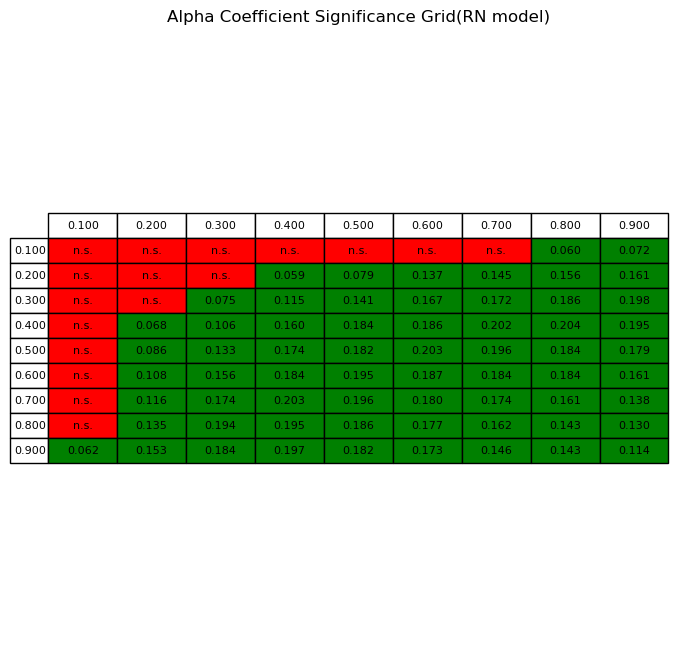

In [73]:
alpha_ims = np.concatenate((np.linspace(0.01, 0.1, 5),np.linspace(0.1, 0.9, 9),np.linspace(0.9, 0.99, 5)))

alpha_ims = [x for i, x in enumerate(alpha_ims) if x not in alpha_ims[:i]]

garch_final_plot(cps,alpha_ims,final_results)

## For random_neighbors

In [61]:
import time

### constant neighbors

In [79]:
def next_state_Level_3(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L, trades):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price) * trades
            else: 
                transaction_quantity[row_index,column_index] = trades*news*transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    return transaction_quantity
print(time.time())

1706645465.6576989


### random_neighbors

In [77]:
def next_state_Level_3(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L, trades):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price) * trades
            else: 
                transaction_quantity[row_index,column_index] = trades*news*transition_table([cur_state[random.randint(0,L-1), random.randint(0,L-1)] for i in range(8)])
    
    return transaction_quantity
print(time.time())

1706570587.570721


In [57]:
var = []
for i in range(10):
    L = 100
    fundamental_value = 100
    initial_price = 100
    time = 100
    constant = 2
    trader_grid = grid_stock_market(L, 0.3)
    constant_trading = 20
    news_relevance = [0.2, 0.7]
    stock = 0.01
    period = 100


    resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, constant, constant_trading, news_relevance, stock, period)
    print(np.var(resultS[1]))
    var.append(np.var(resultS[1]))
print(var)
print(np.mean(var))
"""
from matplotlib.ticker import FormatStrFormatter
a = {0.3:resultS[1]}

plt.figure(figsize=(14, 7))
for key, values in a.items():
    plt.plot(values, label=r'Trend for $\mathrm{\alpha_{im=' + str(key) + '}}$')
plt.title(r'Price Trends for different $\alpha_{\mathrm{im}}$')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(time+1), resultS[3])
plt.show()
plt.close()
"""


6.38952126047493
7.758498505427944
6.403722471284635
7.232609983645316
6.061527167699388
8.470561990492223
4.687758588285304
5.522148266184914
4.255310901505634
3.6333816708639617
[6.38952126047493, 7.758498505427944, 6.403722471284635, 7.232609983645316, 6.061527167699388, 8.470561990492223, 4.687758588285304, 5.522148266184914, 4.255310901505634, 3.6333816708639617]
6.041504080586424


"\nfrom matplotlib.ticker import FormatStrFormatter\na = {0.3:resultS[1]}\n\nplt.figure(figsize=(14, 7))\nfor key, values in a.items():\n    plt.plot(values, label=r'Trend for $\\mathrm{\x07lpha_{im=' + str(key) + '}}$')\nplt.title(r'Price Trends for different $\x07lpha_{\\mathrm{im}}$')\nplt.xlabel('Time Steps')\nplt.ylabel('Price')\nplt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))\nplt.legend()\nplt.show()\n\nplt.figure(2)\nplt.plot(np.arange(time+1), resultS[3])\nplt.show()\nplt.close()\n"

## Use different Cfu setting and alpha_fu

In [88]:
def garch_Cfu(Cfu,alpha_im):
    
    # Notes: F and P0 are set to be 100
    # for level1, trade_parameters only contain "trade_level"
    # level2 : "trade_level" "Cfu" "Cim"
    # level3 : "trade_level" "Cfu" "Cim" "k" "Cl" "Lm"
    #trade_parameters = {"trade_level" : 2,"Cfu" : 0.2 ,"Cim" : 0.7}
    #trade_parameters = {"trade_level" : 3,"Cl" : 20,"Lm" : 0.01,"Cfu" : 0.2,"Cim" : 0.2,"k" : 400}

    L = 33
    fundamental_value = 100
    initial_price = 100
    time = 1000
    constant = 0.5
    trader_grid = grid_stock_market(L, alpha_im)
    constant_trading = 20
    news_relevance = [Cfu, 0.7]
    stock = 0.01
    period = 100

    resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, 
                    constant, constant_trading, news_relevance, stock, period)
    
    price_history = resultS[1]

    returns = np.diff(price_history)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    normalized_returns = [(ret - mean_return) / std_return for ret in returns]

    garch11 = arch_model(normalized_returns, p=1, q=1, rescale=False)
    res = garch11.fit(update_freq=10, disp='off')

    # 提取条件方差
    conditional_variance = res.conditional_volatility
    
    # 可视化条件方差来检查波动率聚集
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(conditional_variance)
    plt.title('Conditional Variance over Time')
    plt.xlabel('Time')
    plt.ylabel('Conditional Variance')
    plt.show()
    """
    

    # Only the values of alpha and beta need to be displayed along with their significance levels
    results = {}
    results["cp"] = cp
    results["alpha_im"] = alpha_im
    results["alpha1_coef"] = res.params['alpha[1]']
    results["alpha1_pvalue"]  = res.pvalues['alpha[1]']

    results["beta1_coef"] = res.params['beta[1]']
    results["beta1_pvalue"] = res.pvalues['beta[1]']
    # 输出模型结果
    results_rounded = {key: round(value, 3) for key, value in results.items()}

    #print(res.summary())
    
    return results_rounded


In [82]:
def run_model_Cfu(Cfu, alpha_im,simulation_time) -> total_results:
    total_results = {
    "Cfu" : Cfu,
    "alpha_im" : alpha_im,
    "alpha1_coef" : [],
    "alpha1_pvalue" : [],
    "beta1_coef" : [],
    "beta1_pvalue": []
    }
    for _ in range(simulation_time):
        return_value = garch_Cfu(Cfu,alpha_im)
        total_results["alpha1_coef"].append(return_value["alpha1_coef"])
        total_results["alpha1_pvalue"].append(return_value["alpha1_pvalue"])
        total_results["beta1_coef"].append(return_value["beta1_coef"])
        total_results["beta1_pvalue"].append(return_value["beta1_pvalue"])
    return total_results

In [85]:
def processed_garch_result_Cfu(total_results):
    # Calculate proportions of pvalues < 0.05
    alpha_pvalues = [pval for pval in total_results['alpha1_pvalue']]
    beta_pvalues = [pval for pval in total_results['beta1_pvalue']]

    alpha_pvalue_mean = np.mean(alpha_pvalues)
    beta_pvalue_mean = np.mean(beta_pvalues)

    alpha_data = [coef for coef, pval in zip(total_results['alpha1_coef'], total_results['alpha1_pvalue']) if pval < 0.05]
    beta_data = [coef for coef, pval in zip(total_results['beta1_coef'], total_results['beta1_pvalue']) if pval < 0.05]

    alpha_mean = np.mean(alpha_data)
    beta_mean = np.mean(beta_data)

    table_analyse = {'Cfu': total_results["Cfu"], 'alpha_im': total_results["alpha_im"]}
    table_analyse["alpha_pvalue_mean"] = alpha_pvalue_mean
    table_analyse["beta_pvalue_mean"] = beta_pvalue_mean
    table_analyse["alpha_mean"] = alpha_mean
    table_analyse["beta_mean"] = beta_mean

    return table_analyse

In [86]:
def garch_final_plot_Cfu(cps,alpha_ims,ffresults):
    cps_round = [format(cp,'.3f') for cp in cps] 
    alpha_ims_round = [format(alpha_im,'.3f')  for alpha_im in alpha_ims] 
    cp_grid, alpha_im_grid = np.meshgrid(cps, alpha_ims)

    # Initialize the plot data
    alpha_values = np.empty(cp_grid.shape, dtype=object)
    beta_values = np.empty(cp_grid.shape, dtype=object)

    # Populate the plot data based on the conditions
    for data in ffresults:
        
        #cp_index = np.where(cps == data['cp'])[0][0]
        #alpha_im_index = np.where(alpha_ims == data['alpha_im'])[0][0]

        cpss = np.array(cps)
        # Find the index of the closest value in b to a
        cp_index = np.abs(cpss - data['Cfu']).argmin()

        alpha_imss = np.array(alpha_ims)
        # Find the index of the closest value in b to a
        alpha_im_index = np.abs(alpha_imss - data['alpha_im']).argmin()
        
        # For alpha
        if data['alpha_pvalue_mean'] < 0.05:
            alpha_values[alpha_im_index, cp_index] = f"{data['alpha_mean']:.3f}"
        else:
            alpha_values[alpha_im_index, cp_index] = "n.s."  # Not significant

        # For beta
        if data['beta_pvalue_mean'] < 0.05:
            beta_values[alpha_im_index, cp_index] = f"{data['beta_mean']:.3f}"
        else:
            beta_values[alpha_im_index, cp_index] = "n.s."  # Not significant
    

    # Function to plot the grid
    def plot_data_grid(data_grid, title, xlabel, ylabel):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Create a color map that uses green for significant values and red for not significant
        colors = np.where(data_grid == "n.s.", 'red', 'green')
        
        # Plot the data
        table = ax.table(cellText=data_grid, cellColours=colors, loc='center',
                        cellLoc='center', rowLabels=alpha_ims_round, colLabels=cps_round)
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.5)

        # Hide the axes
        ax.axis('tight')
        ax.axis('off')
        save_path = r'C:\Users\98398\Desktop\P3 results\plots\RN_beta.png'
        plt.savefig(save_path, dpi=500)
        plt.show()

    # Plotting the grid for alpha
    plot_data_grid(alpha_values, 'Alpha Coefficient Significance Grid(RN model)', 'Cfu', 'alpha_im')

    # Plotting the grid for beta
    plot_data_grid(beta_values, 'Beta Coefficient Significance Grid(RN model)', 'Cfu', 'alpha_im')

Results

In [93]:
Cfus = np.linspace(0.1, 0.9, 10)
alpha_ims = np.linspace(0.1, 0.9, 10)
simulation_time = 10
final_results_Cfu = []
for Cfu in Cfus:
    for alpha_im in alpha_ims:
        total_results = run_model_Cfu(Cfu,alpha_im,simulation_time)
        final_result = processed_garch_result_Cfu(total_results)
        final_results_Cfu.append(final_result)
        print(final_result)

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.1, 'alpha_im': 0.1, 'alpha_pvalue_mean': 0.8975000000000002, 'beta_pvalue_mean': 0.3759, 'alpha_mean': nan, 'beta_mean': 0.892}
{'Cfu': 0.1, 'alpha_im': 0.18888888888888888, 'alpha_pvalue_mean': 0.5248, 'beta_pvalue_mean': 0.05650000000000001, 'alpha_mean': 0.0125, 'beta_mean': 0.9472222222222223}
{'Cfu': 0.1, 'alpha_im': 0.2777777777777778, 'alpha_pvalue_mean': 0.0315, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.04088888888888889, 'beta_mean': 0.9248}
{'Cfu': 0.1, 'alpha_im': 0.3666666666666667, 'alpha_pvalue_mean': 0.0012000000000000001, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.06140000000000001, 'beta_mean': 0.9213999999999999}
{'Cfu': 0.1, 'alpha_im': 0.4555555555555556, 'alpha_pvalue_mean': 0.0189, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.06944444444444445, 'beta_mean': 0.9274999999999999}
{'Cfu': 0.1, 'alpha_im': 0.5444444444444445, 'alpha_pvalue_mean': 0.0052, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.0805, 'beta_mean': 0.9178000000000001}
{'Cfu': 0.1, 'alpha_im': 0.633333

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.6333333333333333, 'alpha_im': 0.8111111111111111, 'alpha_pvalue_mean': 0.5721999999999999, 'beta_pvalue_mean': 0.016800000000000002, 'alpha_mean': nan, 'beta_mean': 0.8856666666666666}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.6333333333333333, 'alpha_im': 0.9, 'alpha_pvalue_mean': 0.8821999999999999, 'beta_pvalue_mean': 0.1001, 'alpha_mean': nan, 'beta_mean': 0.9400000000000001}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.1, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.1981, 'beta_mean': 0.8009000000000001}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.18888888888888888, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.21509999999999999, 'beta_mean': 0.7583}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.2777777777777778, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.1845, 'beta_mean': 0.7536}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.3666666666666667, 'alpha_pvalue_mean': 0.0661, 'beta_pvalue_mean': 0.0398, 'alpha_mean': 0.1295, 'beta_mean': 0.7585555555555555}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.4555555555555556, 'alpha_pvalue_mean': 0.11069999999999999, 'beta_pvalue_mean': 0.0006000000000000001, 'alpha_mean': 0.09442857142857143, 'beta_mea

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.7222222222222222, 'alpha_im': 0.7222222222222222, 'alpha_pvalue_mean': 0.675, 'beta_pvalue_mean': 0.22000000000000003, 'alpha_mean': nan, 'beta_mean': 0.9112857142857144}
{'Cfu': 0.7222222222222222, 'alpha_im': 0.8111111111111111, 'alpha_pvalue_mean': 0.826, 'beta_pvalue_mean': 0.0298, 'alpha_mean': 0.042, 'beta_mean': 0.9285555555555555}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.7222222222222222, 'alpha_im': 0.9, 'alpha_pvalue_mean': 0.8201, 'beta_pvalue_mean': 0.030000000000000006, 'alpha_mean': nan, 'beta_mean': 0.927875}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.1, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.2277, 'beta_mean': 0.7683}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.18888888888888888, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.1958, 'beta_mean': 0.7631000000000001}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.2777777777777778, 'alpha_pvalue_mean': 0.0001, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.1635, 'beta_mean': 0.7539}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.3666666666666667, 'alpha_pvalue_mean': 0.0446, 'beta_pvalue_mean': 0.0036, 'alpha_mean': 0.090875, 'beta_mean': 0.7861}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.4555555555555556, 'alpha_pvalue_mean': 0.26539999999999997, 'beta_pvalue_mean': 0.1663, 'alpha_mean': 0.15, 'beta_mean': 0.860625}
{'Cfu': 0.8111111111111111, 'alpha_im': 0.54

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.8111111111111111, 'alpha_im': 0.6333333333333333, 'alpha_pvalue_mean': 0.9513, 'beta_pvalue_mean': 0.0, 'alpha_mean': nan, 'beta_mean': 0.9390000000000001}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.8111111111111111, 'alpha_im': 0.7222222222222222, 'alpha_pvalue_mean': 0.6725000000000001, 'beta_pvalue_mean': 0.19180000000000003, 'alpha_mean': nan, 'beta_mean': 0.9147142857142857}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.8111111111111111, 'alpha_im': 0.8111111111111111, 'alpha_pvalue_mean': 0.7965, 'beta_pvalue_mean': 0.0001, 'alpha_mean': nan, 'beta_mean': 0.9317}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.8111111111111111, 'alpha_im': 0.9, 'alpha_pvalue_mean': 0.9091000000000001, 'beta_pvalue_mean': 0.1, 'alpha_mean': nan, 'beta_mean': 0.9136666666666667}
{'Cfu': 0.9, 'alpha_im': 0.1, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.19780000000000003, 'beta_mean': 0.7924}
{'Cfu': 0.9, 'alpha_im': 0.18888888888888888, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.2032, 'beta_mean': 0.7529999999999999}
{'Cfu': 0.9, 'alpha_im': 0.2777777777777778, 'alpha_pvalue_mean': 0.0, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.1538, 'beta_mean': 0.7211000000000001}
{'Cfu': 0.9, 'alpha_im': 0.3666666666666667, 'alpha_pvalue_mean': 0.04560000000000001, 'beta_pvalue_mean': 0.075, 'alpha_mean': 0.094, 'beta_mean': 0.7776666666666666}
{'Cfu': 0.9, 'alpha_im': 0.4555555555555556, 'alpha_pvalue_mean': 0.5109, 'beta_pvalue_mean': 0.0019, 'alpha_mean': 0.093, 'beta_mean': 0.8611000000000001}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.9, 'alpha_im': 0.5444444444444445, 'alpha_pvalue_mean': 0.5328, 'beta_pvalue_mean': 0.036199999999999996, 'alpha_mean': nan, 'beta_mean': 0.8495555555555555}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.9, 'alpha_im': 0.6333333333333333, 'alpha_pvalue_mean': 0.9390000000000001, 'beta_pvalue_mean': 0.1001, 'alpha_mean': nan, 'beta_mean': 0.9497777777777778}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.9, 'alpha_im': 0.7222222222222222, 'alpha_pvalue_mean': 0.7839, 'beta_pvalue_mean': 0.00030000000000000003, 'alpha_mean': nan, 'beta_mean': 0.9118}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Cfu': 0.9, 'alpha_im': 0.8111111111111111, 'alpha_pvalue_mean': 0.7674000000000001, 'beta_pvalue_mean': 0.10500000000000001, 'alpha_mean': nan, 'beta_mean': 0.8751111111111112}
{'Cfu': 0.9, 'alpha_im': 0.9, 'alpha_pvalue_mean': 0.8708, 'beta_pvalue_mean': 0.0091, 'alpha_mean': nan, 'beta_mean': 0.9189999999999999}


d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


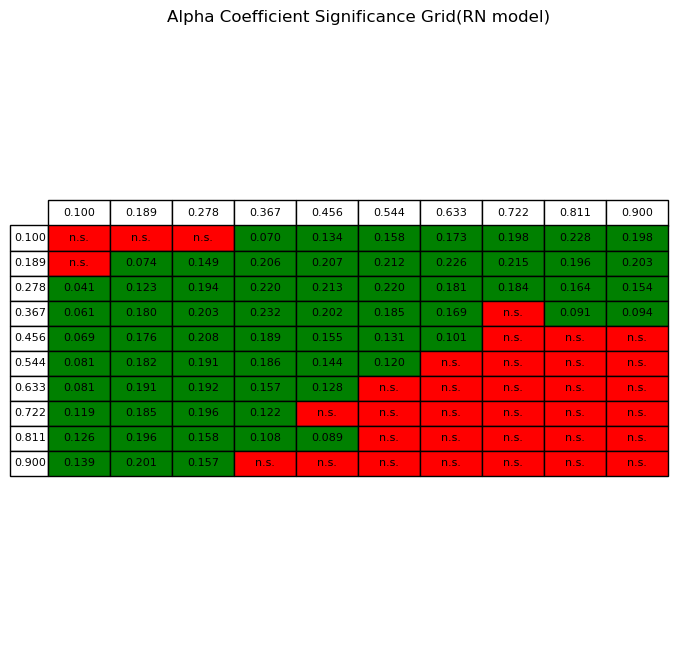

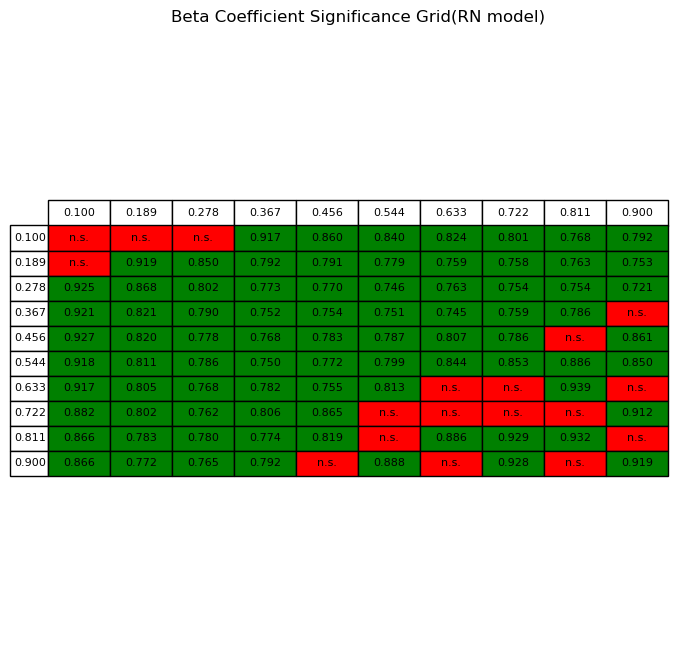

In [94]:
garch_final_plot_Cfu(Cfus,alpha_ims,final_results_Cfu)

## Cfu Cp

In [119]:
def garch_Cp(Cfu,Cp):
    
    # Notes: F and P0 are set to be 100
    # for level1, trade_parameters only contain "trade_level"
    # level2 : "trade_level" "Cfu" "Cim"
    # level3 : "trade_level" "Cfu" "Cim" "k" "Cl" "Lm"
    #trade_parameters = {"trade_level" : 2,"Cfu" : 0.2 ,"Cim" : 0.7}
    #trade_parameters = {"trade_level" : 3,"Cl" : 20,"Lm" : 0.01,"Cfu" : 0.2,"Cim" : 0.2,"k" : 400}

    L = 50
    fundamental_value = 100
    initial_price = 100
    time = 200
    constant = Cp
    trader_grid = grid_stock_market(L, 0.5)
    constant_trading = 20
    news_relevance = [Cfu, 0.7]
    stock = 0.01
    period = 100

    resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, 
                    constant, constant_trading, news_relevance, stock, period)
    
    price_history = resultS[1]

    returns = np.diff(price_history)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    normalized_returns = [(ret - mean_return) / std_return for ret in returns]

    garch11 = arch_model(normalized_returns, p=1, q=1, rescale=False)
    res = garch11.fit(update_freq=10, disp='off')

    # 提取条件方差
    conditional_variance = res.conditional_volatility
    
    # 可视化条件方差来检查波动率聚集
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(conditional_variance)
    plt.title('Conditional Variance over Time')
    plt.xlabel('Time')
    plt.ylabel('Conditional Variance')
    plt.show()
    """
    

    # Only the values of alpha and beta need to be displayed along with their significance levels
    results = {}
    results["cp"] = cp
    results["alpha_im"] = alpha_im
    results["alpha1_coef"] = res.params['alpha[1]']
    results["alpha1_pvalue"]  = res.pvalues['alpha[1]']

    results["beta1_coef"] = res.params['beta[1]']
    results["beta1_pvalue"] = res.pvalues['beta[1]']
    # 输出模型结果
    results_rounded = {key: round(value, 3) for key, value in results.items()}

    #print(res.summary())
    
    return results_rounded


In [104]:
def run_model_Cp(Cfu, Cp,simulation_time) -> total_results:
    total_results = {
    "Cfu" : Cfu,
    "alpha_im" : 0.5,
    "Cp" : Cp,
    "alpha1_coef" : [],
    "alpha1_pvalue" : [],
    "beta1_coef" : [],
    "beta1_pvalue": []
    }
    for _ in range(simulation_time):
        return_value = garch_Cp(Cfu,Cp)
        total_results["alpha1_coef"].append(return_value["alpha1_coef"])
        total_results["alpha1_pvalue"].append(return_value["alpha1_pvalue"])
        total_results["beta1_coef"].append(return_value["beta1_coef"])
        total_results["beta1_pvalue"].append(return_value["beta1_pvalue"])
    return total_results

In [106]:
def processed_garch_result_Cp(total_results):
    # Calculate proportions of pvalues < 0.05
    alpha_pvalues = [pval for pval in total_results['alpha1_pvalue']]
    beta_pvalues = [pval for pval in total_results['beta1_pvalue']]

    alpha_pvalue_mean = np.mean(alpha_pvalues)
    beta_pvalue_mean = np.mean(beta_pvalues)

    alpha_data = [coef for coef, pval in zip(total_results['alpha1_coef'], total_results['alpha1_pvalue']) if pval < 0.05]
    beta_data = [coef for coef, pval in zip(total_results['beta1_coef'], total_results['beta1_pvalue']) if pval < 0.05]

    alpha_mean = np.mean(alpha_data)
    beta_mean = np.mean(beta_data)

    table_analyse = {'Cfu': total_results["Cfu"], 'Cp': total_results["Cp"]}
    table_analyse["alpha_pvalue_mean"] = alpha_pvalue_mean
    table_analyse["beta_pvalue_mean"] = beta_pvalue_mean
    table_analyse["alpha_mean"] = alpha_mean
    table_analyse["beta_mean"] = beta_mean

    return table_analyse

In [128]:
def garch_final_plot_Cp(cps,alpha_ims,ffresults): # first col, second row
    cps_round = [format(cp,'.3f') for cp in cps] 
    alpha_ims_round = [format(alpha_im,'.3f')  for alpha_im in alpha_ims] 
    cp_grid, alpha_im_grid = np.meshgrid(cps, alpha_ims)

    # Initialize the plot data
    alpha_values = np.empty(cp_grid.shape, dtype=object)
    beta_values = np.empty(cp_grid.shape, dtype=object)

    # Populate the plot data based on the conditions
    for data in ffresults:
        
        #cp_index = np.where(cps == data['cp'])[0][0]
        #alpha_im_index = np.where(alpha_ims == data['alpha_im'])[0][0]

        cpss = np.array(cps)
        # Find the index of the closest value in b to a
        cp_index = np.abs(cpss - data['Cfu']).argmin()

        alpha_imss = np.array(alpha_ims)
        # Find the index of the closest value in b to a
        alpha_im_index = np.abs(alpha_imss - data['Cp']).argmin()
        
        # For alpha
        if data['alpha_pvalue_mean'] < 0.05:
            alpha_values[alpha_im_index, cp_index] = f"{data['alpha_mean']:.3f}"
        else:
            alpha_values[alpha_im_index, cp_index] = "n.s."  # Not significant

        # For beta
        if data['beta_pvalue_mean'] < 0.05:
            beta_values[alpha_im_index, cp_index] = f"{data['beta_mean']:.3f}"
        else:
            beta_values[alpha_im_index, cp_index] = "n.s."  # Not significant
    

    # Function to plot the grid
    def plot_data_grid(data_grid, title, xlabel, ylabel):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Create a color map that uses green for significant values and red for not significant
        colors = np.where(data_grid == "n.s.", 'red', 'green')
        
        # Plot the data
        table = ax.table(cellText=data_grid, cellColours=colors, loc='center',
                        cellLoc='center', rowLabels=alpha_ims_round, colLabels=cps_round)
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.5)

        # Hide the axes
        ax.axis('tight')
        ax.axis('off')
        save_path = r'C:\Users\98398\Desktop\P3 results\plots\CFu_CP_beta.png'
        plt.savefig(save_path, dpi=500)
        plt.show()

    # Plotting the grid for alpha
    #plot_data_grid(alpha_values, 'Alpha Coefficient Significance Grid(RN model)', 'Cfu', 'alpha_im')

    # Plotting the grid for beta
    plot_data_grid(beta_values, 'Beta Coefficient Significance Grid(RN model)', 'Cfu', 'alpha_im')

In [ ]:
Cfus = np.linspace(0.1, 0.9, 9)
Cfus = Cfus[::-1]
Cps = np.linspace(0.1, 0.9, 9)
simulation_time = 10
final_results_Cp = []
for Cfu in Cfus:
    for Cp in Cps:
        total_results = run_model_Cp(Cfu,Cp,simulation_time)
        final_result = processed_garch_result_Cp(total_results)
        final_results_Cp.append(final_result)
        print(1)

In [124]:
important = final_results_Cp

[{'Cfu': 0.9, 'Cp': 0.1, 'alpha_pvalue_mean': 0.037, 'beta_pvalue_mean': 0.0, 'alpha_mean': 0.177, 'beta_mean': 0.8146000000000001}, {'Cfu': 0.9, 'Cp': 0.2, 'alpha_pvalue_mean': 0.035500000000000004, 'beta_pvalue_mean': 0.1, 'alpha_mean': 0.27142857142857146, 'beta_mean': 0.7197777777777778}, {'Cfu': 0.9, 'Cp': 0.30000000000000004, 'alpha_pvalue_mean': 0.43839999999999996, 'beta_pvalue_mean': 0.0182, 'alpha_mean': 0.27899999999999997, 'beta_mean': 0.826111111111111}, {'Cfu': 0.9, 'Cp': 0.4, 'alpha_pvalue_mean': 0.6601, 'beta_pvalue_mean': 0.18159999999999998, 'alpha_mean': 0.11349999999999999, 'beta_mean': 0.9051666666666667}, {'Cfu': 0.9, 'Cp': 0.5, 'alpha_pvalue_mean': 0.819, 'beta_pvalue_mean': 0.0, 'alpha_mean': nan, 'beta_mean': 0.9328}, {'Cfu': 0.9, 'Cp': 0.6, 'alpha_pvalue_mean': 0.8642, 'beta_pvalue_mean': 0.2011, 'alpha_mean': nan, 'beta_mean': 0.8685}, {'Cfu': 0.9, 'Cp': 0.7000000000000001, 'alpha_pvalue_mean': 0.9015000000000001, 'beta_pvalue_mean': 0.1217, 'alpha_mean': 0.1

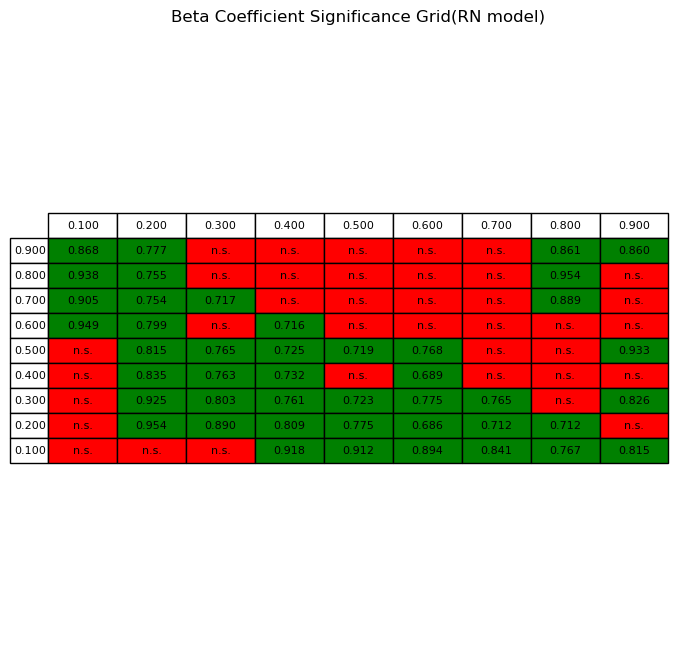

In [130]:
print(final_results_Cp)
garch_final_plot_Cp(Cfus,Cps,final_results_Cp)# first col, second row

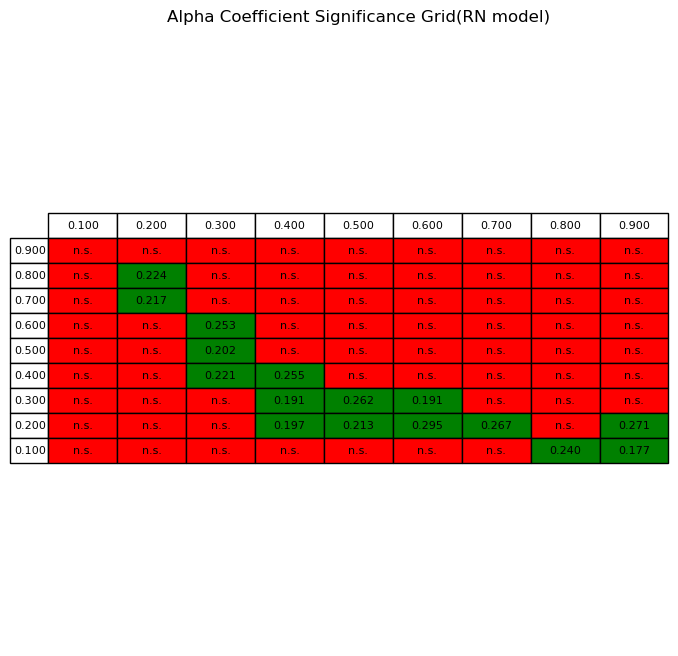

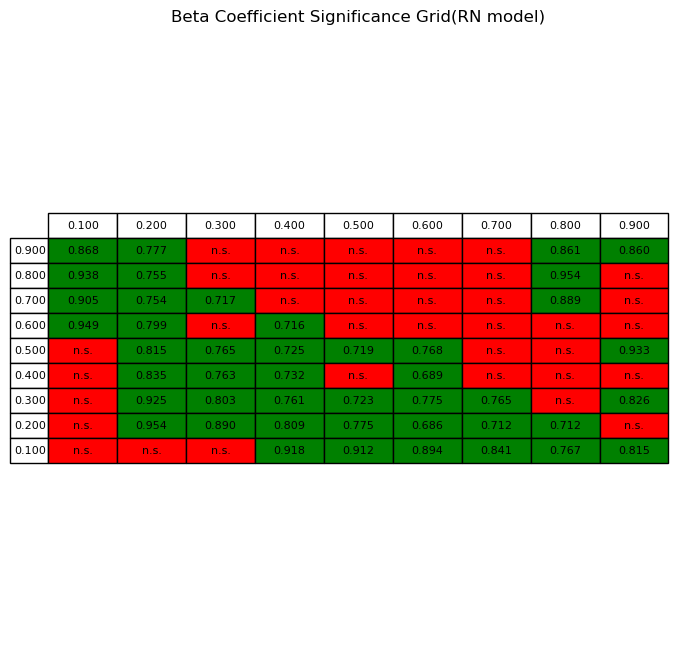

In [125]:
Cfus = Cfus[::-1]
Cps = Cps[::-1]
garch_final_plot_Cp(Cfus,Cps,final_results_Cp)# first col, second row